### SEIS 763-01: Homework 8
#### Completed by: Jamie Boehme

Import libraries needed for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV, LassoCV, LassoLarsCV, Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

Import cell DNA data from “ML_HW_Data_CellDNA.csv” file located on Github.

In [2]:
file = 'ML_HW_Data_CancerGene.xlsx'
cell = pd.read_csv(file, header=None)
cell.columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','Target']
cell.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Target
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7


Do some exploratory analysis of the dataset including: reviewing number of columns and rows, data types, and overall shape of each column. Determine if there appear to be any obvious outliers. Check if there are any null values that will need to be taken care of prior to building a linear regression model.

In [3]:
cell.shape

(1217, 14)

In [4]:
cell.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'Target'],
      dtype='object')

In [5]:
cell.dtypes

V1          int64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8          int64
V9          int64
V10       float64
V11       float64
V12       float64
V13       float64
Target      int64
dtype: object

In [6]:
cell.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Target
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,200.366475,419.476953,211.335155,33.388599,9.376939,0.908628,0.160337,202.640099,0.516845,15.288929,0.775538,0.474788,78.928198,0.903862
std,135.665649,215.563920,141.592818,19.152143,3.634969,0.110942,50.589440,142.585975,2.071880,4.623930,0.117802,0.158341,48.798548,2.348318
min,70.000000,28.176471,27.870130,10.282437,3.080963,0.218074,-89.531335,70.000000,-26.000000,9.440697,0.261049,0.114482,28.193000,0.000000
25%,107.000000,243.400000,96.200000,18.760441,7.529888,0.885337,-41.131405,108.000000,1.000000,11.672045,0.702186,0.353261,45.974000,0.000000
50%,160.000000,415.360000,183.834286,27.832476,8.463304,0.949998,-0.104479,161.000000,1.000000,14.272993,0.789474,0.474359,66.302000,0.000000
75%,252.000000,611.128440,292.824742,44.462419,9.801152,0.978903,41.010273,253.000000,1.000000,17.912464,0.866071,0.592593,97.928000,0.000000
max,1089.000000,773.919643,575.340206,155.330123,43.487111,0.998459,89.881120,1159.000000,1.000000,37.236513,1.000000,0.905882,493.749000,10.000000


In [7]:
cell.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
Target    0
dtype: int64

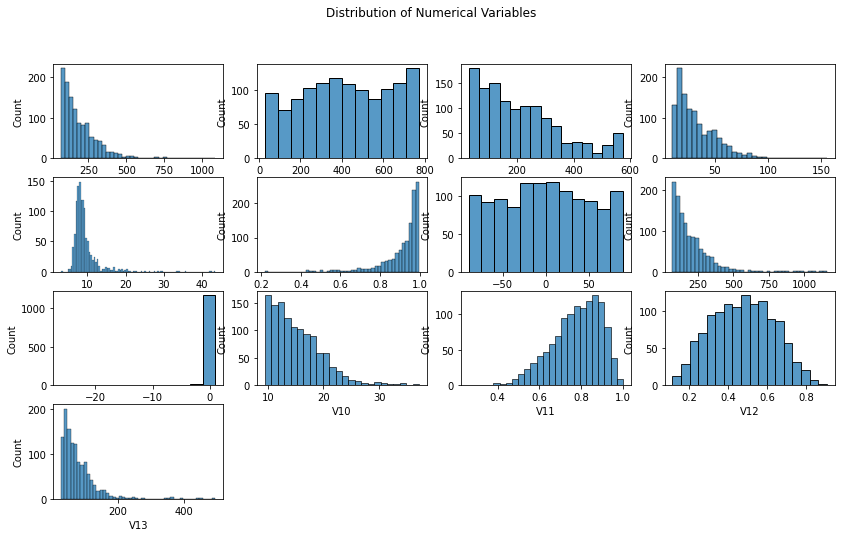

In [8]:
def graph_num(num_variable, dataframe):
    sns.histplot(dataframe[num_variable])
    
num_columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13']
plot_num = plt.figure(figsize=(14,8))
plt.suptitle('Distribution of Numerical Variables')

plotnum=1
for num_var in num_columns:
    plt.subplot(4,4,plotnum)
    graph_num(num_var, cell)
    plotnum +=1
plt.show()

The above graphs show that we may have outliers in our data based upon a few distributions - however, without further domain knowledge we will ignore eliminating any data points at this time.

Prep the target variable for modeling:
- Seperate target variable from the cell dataframe
- Convert the target variable back to a dataframe
- Replace all values > 0 with a 1 for bivariate analysis

In [9]:
target_split = cell.loc[:,'Target']
target_split = pd.DataFrame(target_split)
target_split.loc[target_split.Target > 0, 'Target'] = 1

In [10]:
target_split.describe()

,Target
count,1217.000000
mean,0.164339
std,0.370735
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
y = target_split.values.ravel()

Standardize numeric variables for the purposes of modeling.

In [12]:
cell_predictors = cell.iloc[:,0:13]

In [13]:
cell_predictors.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072


In [14]:
ZX= preprocessing.scale(cell_predictors)
X = pd.DataFrame(ZX)
print(X, '\n')
print(X.mean(axis=0), 
X.std(axis=0))

            0         1         2         3         4         5         6   \
0     0.159528 -1.802006 -1.208134  0.114420 -0.135689  0.538311 -1.587426   
1    -0.939212 -1.809877  0.424363 -0.933511 -0.817247  0.019258  1.500586   
2     0.410247 -1.673790  0.555385  0.200447  0.134019  0.501621  1.684134   
3    -0.548385 -1.617137  1.879947 -1.059096  0.939523 -6.206504  1.253012   
4     0.181650 -1.525316  2.335905  0.578476 -0.417798  0.681969 -1.048779   
...        ...       ...       ...       ...       ...       ...       ...   
1212  0.115283  1.480684  0.036132  0.252878  0.049329  0.537678  0.250896   
1213  0.941181  1.528803 -1.156399  1.554010 -0.075675  0.729753  1.142193   
1214 -0.762234  1.588181 -0.028590 -0.555628 -0.315562  0.213238 -0.491114   
1215  0.166902  1.629782  0.170750  1.050082 -0.201979  0.705453  1.445251   
1216 -0.835975  1.603325  0.383793 -1.040983 -0.235315 -1.213681  0.364560   

            7         8         9         10        11        1

**1. Experiment your SVM RBF model with different “box constraints” and “kernel
scales”**

**2. What is the accuracy, Precision, and Recall for each class prediction under each
of your above experiments?**

In [15]:
kernel_list=['rbf']
box_constraint = [1,10,100,1000]
kernel_size = [.001,.1,1,10]

for k in kernel_list:
    for c in box_constraint:
        for g in kernel_size:
                if k in ('rbf','poly','sigmoid'):
                    clf_k_c = svm.SVC(kernel=k, C=c, gamma = g, probability=True)
                    clf_k_c.fit(X,y)
                    clf_k_c_score = clf_k_c.score(X,y)
                    print('SVC Model\nkernel type:',k,' box constraint:',c,' kernel size:',g)
                    print(clf_k_c, ': ', clf_k_c_score)
                    y_pred = clf_k_c.predict(X)
                    scores_k_c =classification_report(y,y_pred)
                    print(scores_k_c, '\n')
                else:
                    clf_k_c = svm.SVC(kernel=k, C=c, probability=True)
                    clf_k_c.fit(X,y)
                    clf_k_c_score = clf_k_c.score(X,y)
                    print('SVC Model\nkernel type:',k,' box constraint:',c,' kernel size: N/A')
                    print(clf_k_c, ': ', clf_k_c_score)
                    y_pred = clf_k_c.predict(X)
                    scores_k_c =classification_report(y,y_pred)
                    print(scores_k_c, '\n')

SVC Model
kernel type: rbf  box constraint: 1  kernel size: 0.001
SVC(C=1, gamma=0.001, probability=True) :  0.8373048479868529
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1017
           1       1.00      0.01      0.02       200

    accuracy                           0.84      1217
   macro avg       0.92      0.51      0.47      1217
weighted avg       0.86      0.84      0.76      1217
 

SVC Model
kernel type: rbf  box constraint: 1  kernel size: 0.1
SVC(C=1, gamma=0.1, probability=True) :  0.9317995069843878
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1017
           1       0.84      0.72      0.78       200

    accuracy                           0.93      1217
   macro avg       0.89      0.85      0.87      1217
weighted avg       0.93      0.93      0.93      1217
 

SVC Model
kernel type: rbf  box constraint: 1  kernel size: 1
SVC(C=1, gamma=1, probabilit

**3. Is there any trend that you observed in your experiments?**

- I observed that as kernel size(gamma) increases, box-constraint remaining the same, so does the level of accurarcy within this dataset. 
- I also observed that as the box-constraint increases, kernel-remaining the same, so does the level of accuracy within this dataset.
- I noticed that there seems to be an inverse relationship between kernel and box-constraint, that if kernel size increases, the box-constraint doesn't need to increase as much to get the same results when not using kernel or box-constraint alone. Using a combination of complexity (box-constraint, c) and kernel size (gamma) can achieve the same results with lowering the complexity, c,  and structurally regularizing the model with gamma.

**5. Create an ROC curve plot for EACH class in Just ONE of your
experiments**

Since the data set is only 1000 records, I thought it would be most appropriate to choose an ROC Curve with a box constraint and kernel proportionate to the record size (C=1, gamma = 10).

roc_auc_0:  0.0
roc_auc_1:  1.0 



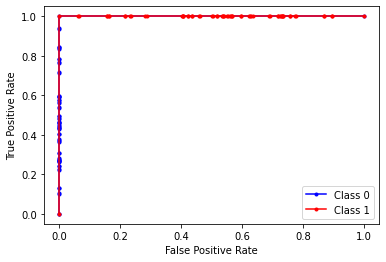

In [16]:
optimal_clf = svm.SVC(kernel='rbf', C=1, gamma=10, probability=True)
optimal_clf.fit(X,y)

# probability
optimal_yhat= optimal_clf.predict_proba(X)

# class 0
fpr_0, tpr_0, _ = roc_curve(y, optimal_yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y, optimal_yhat[:, 0])

# class 1
fpr_1, tpr_1, _ = roc_curve(y, optimal_yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y, optimal_yhat[:, 1])

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()